In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [42]:
directory = '../../classifier/20240110/predictions'
dfs = []

# Function to format the filename
def format_filename(filename):
    # Strip prefix and suffix
    return filename.replace('pred20240110_', '').replace('.tsv', '')

# Iterate over all TSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.tsv'):
        file_path = os.path.join(directory, filename)
        
        # Read the TSV file
        df = pd.read_csv(file_path, delimiter='\t')
        
        # Add the 'merged' column with formatted filename
        df['merged'] = format_filename(filename)
        
        # Append to the list of dataframes
        dfs.append(df)

# Concatenate all dataframes
merged_df = pd.concat(dfs)

# Function to join unique filenames
def join_filenames(series):
    return ', '.join(series.unique())

# Group by 'row_id' and 'media_id', and aggregate
merged_df = merged_df.groupby(['row_id', 'media_id'], as_index=False).agg({
    'prob_max': 'first',
    'row_id_label': 'first',
    'media_id_label': 'first',
    'ncbi_link': 'first',
    'media_link': 'first',
    'merged': join_filenames
})

# Calculate 'merge_count' as the number of unique filenames
merged_df['merge_count'] = merged_df['merged'].apply(lambda x: len(x.split(', ')))

# Save the result to a new TSV file
merged_df.to_csv('pred2024010_merged_output.tsv', sep='\t', index=False)

merged_df

,row_id,media_id,prob_max,row_id_label,media_id_label,ncbi_link,media_link,merged,merge_count
0,NCBITaxon:100,mediadive.medium:65,0.917317,Ancylobacter aquaticus,GYM STREPTOMYCES MEDIUM (DSMZ Medium 65),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/65,wembeddings_traingreat4,1
1,NCBITaxon:1000560,mediadive.medium:535,0.186054,Escherichia coli VDP,TRYPTICASE SOY BROTH AGAR (DSMZ Medium 535),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/535,wembeddingsnotaxmed_traingreat9,1
2,NCBITaxon:1000560,mediadive.medium:693,0.257565,Escherichia coli VDP,COLUMBIA BLOOD MEDIUM (DSMZ Medium 693),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/693,"wembeddings_traingreat9, wembeddings_traingrea...",3
3,NCBITaxon:1000560,mediadive.medium:830,0.186929,Escherichia coli VDP,R2A MEDIUM (DSMZ Medium 830),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/830,wembeddings_traingreat1,1
4,NCBITaxon:1000561,mediadive.medium:1,0.317528,Pseudomonas aeruginosa AES-1R,NUTRIENT AGAR (DSMZ Medium 1),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/1,wembeddings_traingreat2,1
...,...,...,...,...,...,...,...,...,...
68184,NCBITaxon:999891,mediadive.medium:J28,0.316120,Bacillus amyloliquefaciens TA208,BRAIN HEART INFUSION AGAR,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/J28,wembeddings_traingreat3,1
68185,NCBITaxon:999892,mediadive.medium:535,0.184071,Cutibacterium modestum P08,TRYPTICASE SOY BROTH AGAR (DSMZ Medium 535),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/535,wembeddingsnotaxmed_traingreat9,1
68186,NCBITaxon:999892,mediadive.medium:693,0.493629,Cutibacterium modestum P08,COLUMBIA BLOOD MEDIUM (DSMZ Medium 693),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/693,"wembeddings_traingreat9, wembeddings_traingrea...",3
68187,NCBITaxon:999892,mediadive.medium:J118,0.284313,Cutibacterium modestum P08,MARINE AGAR 2216,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/J118,wembeddings_traingreat1,1


In [43]:

merged_df = merged_df.sort_values(by='prob_max', ascending=False)
merged_df

,row_id,media_id,prob_max,row_id_label,media_id_label,ncbi_link,media_link,merged,merge_count
37523,NCBITaxon:169760,mediadive.medium:1a,0.999484,Paenibacillus stellifer,REACTIVATION WITH LIQUID MEDIUM 1 (DSMZ Medium...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/1a,wembeddings_traingreat4,1
50386,NCBITaxon:487319,mediadive.medium:830,0.999386,Shewanella marina,R2A MEDIUM (DSMZ Medium 830),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/830,wembeddings_traingreat1,1
6745,NCBITaxon:1121897,mediadive.medium:804,0.999334,Flavobacterium soli DSM 19725,HAEMOPHILUS MEDIUM (DSMZ Medium 804),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/804,wembeddings_traingreat4,1
35254,NCBITaxon:1458307,mediadive.medium:220,0.999179,Octadecabacter temperatus,CASO AGAR (MERCK 105458) (DSMZ Medium 220),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/220,wembeddings_traingreat4,1
18909,NCBITaxon:1276227,mediadive.medium:J66,0.999128,Spiroplasma chrysopicola DF-1,V8 JUICE AGAR,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/J66,wembeddings_traingreat4,1
...,...,...,...,...,...,...,...,...,...
57225,NCBITaxon:675511,mediadive.medium:1,0.037167,Methylotuvimicrobium buryatense 5G,NUTRIENT AGAR (DSMZ Medium 1),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/1,wembeddings_traingreat1,1
12927,NCBITaxon:1175296,mediadive.medium:514,0.035401,Methanomassiliicoccus luminyensis B10,BACTO MARINE BROTH (DIFCO 2216) (DSMZ Medium 514),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/514,wembeddings_traingreat1,1
64549,NCBITaxon:90730,mediadive.medium:J14,0.033087,Desulfosarcina cetonica,EG MEDIUM,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/J14,wembeddings_traingreat1,1
68166,NCBITaxon:999630,mediadive.medium:1,0.029707,Thermoproteus uzoniensis 768-20,NUTRIENT AGAR (DSMZ Medium 1),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/1,wembeddings_traingreat1,1


In [48]:
merged_df_top_comb = merged_df[(merged_df['prob_max'] > 0.9) | (merged_df['merge_count'] > 2)]

merged_df_top_comb

,row_id,media_id,prob_max,row_id_label,media_id_label,ncbi_link,media_link,merged,merge_count,merge_count_jittered
37523,NCBITaxon:169760,mediadive.medium:1a,0.999484,Paenibacillus stellifer,REACTIVATION WITH LIQUID MEDIUM 1 (DSMZ Medium...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/1a,wembeddings_traingreat4,1,0.628356
50386,NCBITaxon:487319,mediadive.medium:830,0.999386,Shewanella marina,R2A MEDIUM (DSMZ Medium 830),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/830,wembeddings_traingreat1,1,0.928804
6745,NCBITaxon:1121897,mediadive.medium:804,0.999334,Flavobacterium soli DSM 19725,HAEMOPHILUS MEDIUM (DSMZ Medium 804),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/804,wembeddings_traingreat4,1,0.726337
35254,NCBITaxon:1458307,mediadive.medium:220,0.999179,Octadecabacter temperatus,CASO AGAR (MERCK 105458) (DSMZ Medium 220),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/220,wembeddings_traingreat4,1,0.677641
18909,NCBITaxon:1276227,mediadive.medium:J66,0.999128,Spiroplasma chrysopicola DF-1,V8 JUICE AGAR,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/J66,wembeddings_traingreat4,1,0.671008
...,...,...,...,...,...,...,...,...,...,...
48858,NCBITaxon:44749,mediadive.medium:693,0.074219,Sporobacter termitidis,COLUMBIA BLOOD MEDIUM (DSMZ Medium 693),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/693,"wembeddings_traingreat2, wembeddings_traingrea...",3,2.734127
60857,NCBITaxon:76861,mediadive.medium:693,0.063808,Cellulomonas persica,COLUMBIA BLOOD MEDIUM (DSMZ Medium 693),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/693,"wembeddingsnotaxmed_traingreat9, wembeddings_t...",3,3.122016
64628,NCBITaxon:909663,mediadive.medium:830,0.062832,Syntrophorhabdus aromaticivorans UI,R2A MEDIUM (DSMZ Medium 830),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/830,"wembeddings_traingreat2, wembeddings_traingrea...",3,3.180800
29076,NCBITaxon:1408159,mediadive.medium:830,0.060715,Thermotoga caldifontis AZM44c09,R2A MEDIUM (DSMZ Medium 830),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/830,"wembeddings_traingreat2, wembeddings_traingrea...",3,2.624242


In [50]:
merged_df_top = merged_df[(merged_df['prob_max'] > 0.9)]

merged_df_top

,row_id,media_id,prob_max,row_id_label,media_id_label,ncbi_link,media_link,merged,merge_count,merge_count_jittered
37523,NCBITaxon:169760,mediadive.medium:1a,0.999484,Paenibacillus stellifer,REACTIVATION WITH LIQUID MEDIUM 1 (DSMZ Medium...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/1a,wembeddings_traingreat4,1,0.628356
50386,NCBITaxon:487319,mediadive.medium:830,0.999386,Shewanella marina,R2A MEDIUM (DSMZ Medium 830),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/830,wembeddings_traingreat1,1,0.928804
6745,NCBITaxon:1121897,mediadive.medium:804,0.999334,Flavobacterium soli DSM 19725,HAEMOPHILUS MEDIUM (DSMZ Medium 804),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/804,wembeddings_traingreat4,1,0.726337
35254,NCBITaxon:1458307,mediadive.medium:220,0.999179,Octadecabacter temperatus,CASO AGAR (MERCK 105458) (DSMZ Medium 220),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/220,wembeddings_traingreat4,1,0.677641
18909,NCBITaxon:1276227,mediadive.medium:J66,0.999128,Spiroplasma chrysopicola DF-1,V8 JUICE AGAR,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/J66,wembeddings_traingreat4,1,0.671008
...,...,...,...,...,...,...,...,...,...,...
15950,NCBITaxon:1223545,mediadive.medium:429,0.900074,Gordonia soli NBRC 108243,COLUMBIA BLOOD AGAR (DSMZ Medium 429),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/429,wembeddings_traingreat4,1,1.243297
51143,NCBITaxon:51513,mediadive.medium:J26,0.900062,Agromyces sp.,R AGAR,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/J26,wembeddings_traingreat4,1,1.269441
1629,NCBITaxon:104,mediadive.medium:J28,0.900045,Cyclobacterium marinum,BRAIN HEART INFUSION AGAR,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/J28,wembeddings_traingreat3,1,1.139797
13334,NCBITaxon:1182736,mediadive.medium:514,0.900025,Escherichia coli KTE169,BACTO MARINE BROTH (DIFCO 2216) (DSMZ Medium 514),https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,https://mediadive.dsmz.de/medium/514,wembeddings_traingreat3,1,0.848428


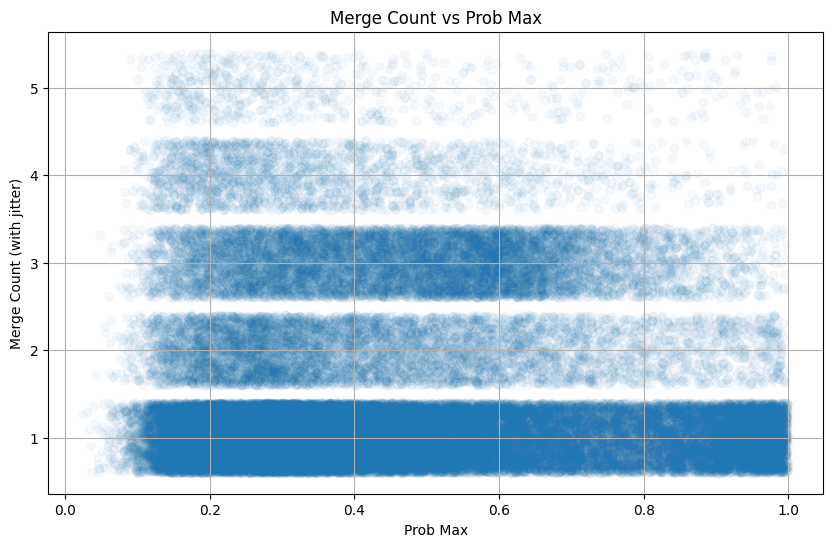

In [46]:
jitter_strength = 0.4
merged_df['merge_count_jittered'] = merged_df['merge_count'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(merged_df))

# Creating the scatter plot with transparency
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['prob_max'], merged_df['merge_count_jittered'], alpha=0.04)  # alpha for transparency
plt.xlabel('Prob Max')
plt.ylabel('Merge Count (with jitter)')
plt.title('Merge Count vs Prob Max')
plt.grid(True)

plt.savefig('mergecount_vs_probmax.pdf', format='pdf')

plt.show()

/var/folders/hx/svkm0dlj0bd9689lm21_7fyw0000gs/T/ipykernel_94123/586416027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_top['merge_count_jittered'] = merged_df_top['merge_count'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(merged_df_top))


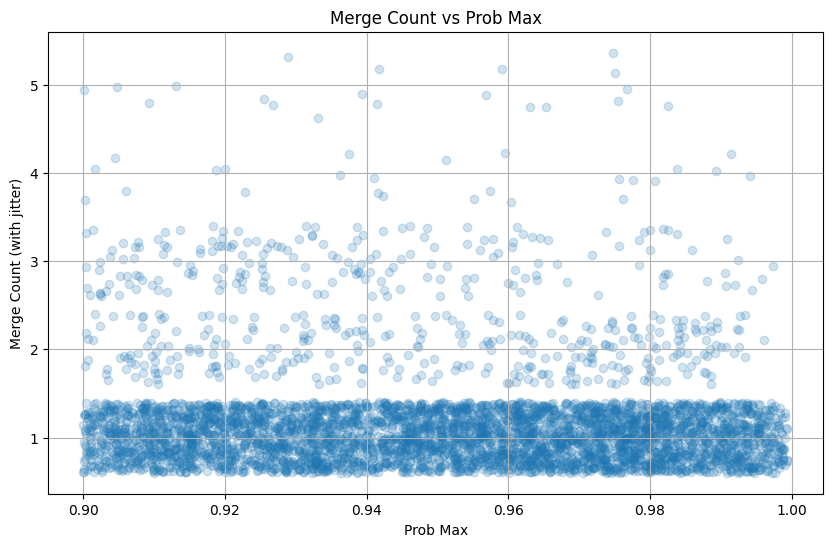

In [52]:
jitter_strength = 0.4
merged_df_top['merge_count_jittered'] = merged_df_top['merge_count'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(merged_df_top))

# Creating the scatter plot with transparency
plt.figure(figsize=(10, 6))
plt.scatter(merged_df_top['prob_max'], merged_df_top['merge_count_jittered'], alpha=0.2)  # alpha for transparency
plt.xlabel('Prob Max')
plt.ylabel('Merge Count (with jitter)')
plt.title('Merge Count vs Prob Max')
plt.grid(True)

plt.savefig('mergecount_vs_probmax_top.pdf', format='pdf')

plt.show()

In [54]:
merged_df_top.describe()

,prob_max,merge_count,merge_count_jittered
count,4720.000000,4720.000000,4720.000000
mean,0.950599,1.177119,1.174744
std,0.027701,0.554304,0.596013
min,0.900023,1.000000,0.600613
25%,0.926742,1.000000,0.825365
50%,0.952349,1.000000,1.047294
75%,0.974625,1.000000,1.277321
max,0.999484,5.000000,5.363541


In [55]:
top_10_values = {}

for column in merged_df_top.columns:
    top_10_values[column] = merged_df_top[column].value_counts().head(10)

top_10_values

{'row_id': row_id
 NCBITaxon:582514     3
 NCBITaxon:1191326    3
 NCBITaxon:575788     3
 NCBITaxon:1191324    3
 NCBITaxon:313598     3
 NCBITaxon:1822218    3
 NCBITaxon:1121252    3
 NCBITaxon:314287     3
 NCBITaxon:1177181    3
 NCBITaxon:333990     3
 Name: count, dtype: int64,
 'media_id': media_id
 mediadive.medium:514    795
 mediadive.medium:220    485
 mediadive.medium:693    435
 mediadive.medium:65     304
 mediadive.medium:J22    291
 mediadive.medium:830    255
 mediadive.medium:J28    218
 mediadive.medium:535    183
 mediadive.medium:1a     164
 mediadive.medium:J26    143
 Name: count, dtype: int64,
 'prob_max': prob_max
 0.999484    1
 0.935325    1
 0.934992    1
 0.935031    1
 0.935043    1
 0.935043    1
 0.935053    1
 0.935086    1
 0.935140    1
 0.935151    1
 Name: count, dtype: int64,
 'row_id_label': row_id_label
 Rubidibacter lacunae              3
 Vibrio tasmaniensis ZS-17         3
 Vibrio atlanticus LGP32           3
 Vibrio tasmaniensis 1F-267      